In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [5]:
df2=pd.read_csv("tsne1.2.csv")
df=pd.read_csv("tracks_features.csv")
# scaled_features = scaled_features[:5000]
df=df[:99998]
df2=df2[:99998]
df

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
0,7lmeHLHBe4nmXzuXc0HDjk,Testify,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],1,1,False,0.470,...,0.0727,0.02610,0.000011,0.3560,0.503,117.906,210133,4,1999,02-11-1999
1,1wsRitfRRtWyEapl0q22o8,Guerrilla Radio,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],2,1,True,0.599,...,0.1880,0.01290,0.000071,0.1550,0.489,103.680,206200,4,1999,02-11-1999
2,1hR0fIFK2qRG3f3RF70pb7,Calm Like a Bomb,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],3,1,False,0.315,...,0.4830,0.02340,0.000002,0.1220,0.370,149.749,298893,4,1999,02-11-1999
3,2lbASgTSoDO7MTuLAXlTW0,Mic Check,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],4,1,True,0.440,...,0.2370,0.16300,0.000004,0.1210,0.574,96.752,213640,4,1999,02-11-1999
4,1MQTmpYOZ6fcMQc56Hdo7T,Sleep Now In the Fire,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],5,1,False,0.426,...,0.0701,0.00162,0.105000,0.0789,0.539,127.059,205600,4,1999,02-11-1999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,2V7MUfpnYxttoEpP8RORYr,The Re-Arranger,Re-Arrange Us,5XSlVbnsGPvimo5pygxkSv,['Mates of State'],['4IELX7NrLBXuw8f51cUZuM'],4,1,False,0.565,...,0.0441,0.28300,0.000003,0.0665,0.354,145.069,268640,4,2008,2008
99994,54Y8hw7tJVhfiMl4fR6HM8,Jigsaw,Re-Arrange Us,5XSlVbnsGPvimo5pygxkSv,['Mates of State'],['4IELX7NrLBXuw8f51cUZuM'],5,1,False,0.447,...,0.0394,0.02340,0.000590,0.1150,0.417,122.126,194387,4,2008,2008
99995,3onwqb1aDAhOEKk2z54MDz,Blue and Gold Print,Re-Arrange Us,5XSlVbnsGPvimo5pygxkSv,['Mates of State'],['4IELX7NrLBXuw8f51cUZuM'],6,1,False,0.610,...,0.0321,0.03340,0.003800,0.5080,0.109,128.023,262933,4,2008,2008
99996,15aq0vixWE6bnSV2OleGB0,Help Help,Re-Arrange Us,5XSlVbnsGPvimo5pygxkSv,['Mates of State'],['4IELX7NrLBXuw8f51cUZuM'],7,1,False,0.601,...,0.0374,0.03900,0.000032,0.1180,0.332,144.990,224800,4,2008,2008


In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
#Scaling the data

features= df.drop(['id','name', 'album','album_id','artists','artist_ids','release_date'], axis=1)



# scaler = StandardScaler()
# scaled_features = scaler.fit_transform(features)
scaler = MinMaxScaler()

# Normalize all columns of the dataframe
scaled_features = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)
scaled_features = scaled_features[:99998]
scaled_features

,track_number,disc_number,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year
0,0.000000,0.0,0.0,0.476190,0.978,0.636364,0.844550,1.0,0.075259,0.026205,0.000011,0.3560,0.503,0.479040,0.034547,0.8,0.776596
1,0.020408,0.0,1.0,0.606890,0.957,1.000000,0.838904,1.0,0.194617,0.012952,0.000071,0.1550,0.489,0.421241,0.033897,0.8,0.776596
2,0.040816,0.0,0.0,0.319149,0.970,0.636364,0.844163,1.0,0.500000,0.023494,0.000002,0.1220,0.370,0.608414,0.049209,0.8,0.776596
3,0.061224,0.0,1.0,0.445795,0.967,1.000000,0.837883,0.0,0.245342,0.163655,0.000004,0.1210,0.574,0.393093,0.035126,0.8,0.776596
4,0.081633,0.0,0.0,0.431611,0.929,0.181818,0.823978,1.0,0.072567,0.001627,0.105000,0.0789,0.539,0.516227,0.033798,0.8,0.776596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,0.061224,0.0,0.0,0.572442,0.762,0.454545,0.850830,1.0,0.045652,0.284137,0.000003,0.0665,0.354,0.589400,0.044211,0.8,0.872340
99994,0.081633,0.0,0.0,0.452888,0.815,0.000000,0.873320,1.0,0.040787,0.023494,0.000590,0.1150,0.417,0.496185,0.031945,0.8,0.872340
99995,0.102041,0.0,0.0,0.618034,0.687,0.090909,0.801395,1.0,0.033230,0.033534,0.003800,0.5080,0.109,0.520144,0.043269,0.8,0.872340
99996,0.122449,0.0,0.0,0.608916,0.835,0.727273,0.855888,1.0,0.038716,0.039157,0.000032,0.1180,0.332,0.589079,0.036969,0.8,0.872340


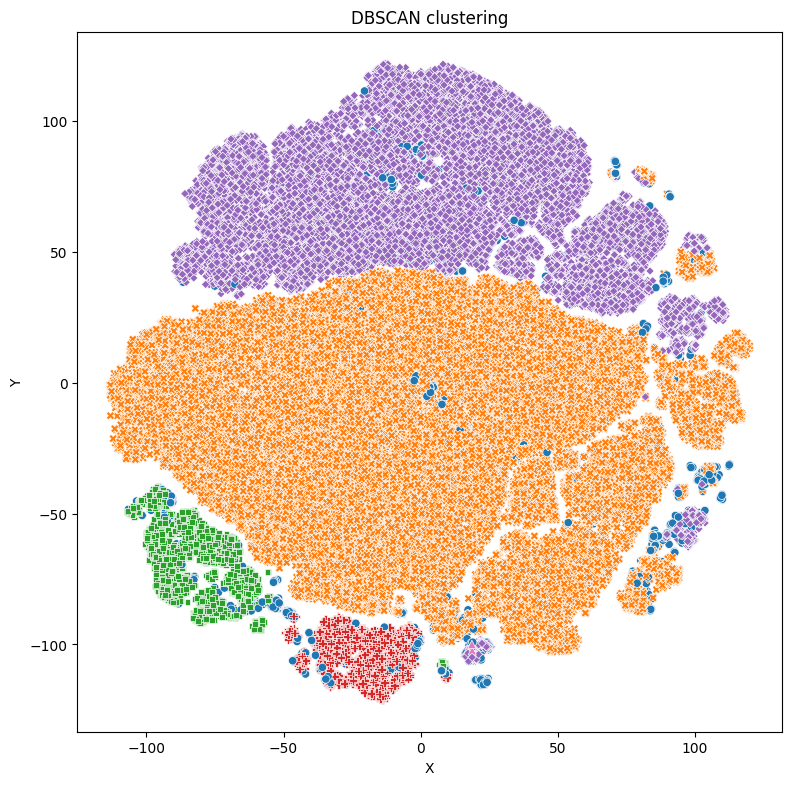

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import (
    AgglomerativeClustering, Birch, KMeans, SpectralClustering,
    DBSCAN, OPTICS
)
from sklearn.mixture import GaussianMixture
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, silhouette_score,
    pairwise_distances, davies_bouldin_score, calinski_harabasz_score
)

def single_model_and_plot(model_name, df, df_clusters, title, K=None, random_state=0):
    if model_name == 'KMeans':
        clustering_model = KMeans(n_clusters=K, random_state=random_state)
    elif model_name == 'Birch':
        clustering_model = Birch(n_clusters=K)
    elif model_name == 'Agglomerative':
        clustering_model = AgglomerativeClustering(n_clusters=K)
    elif model_name == 'GaussianMixture':
        clustering_model = GaussianMixture(n_components=K, random_state=random_state)
    elif model_name == 'SpectralClustering':
        clustering_model = SpectralClustering(n_clusters=K, random_state=random_state)
    elif model_name == 'DBSCAN':
        clustering_model = DBSCAN(eps=0.5, min_samples=15)
    elif model_name == 'OPTICS':
        clustering_model = OPTICS()
    else:
        raise ValueError(f"Model {model_name} not supported")

    if model_name == 'GaussianMixture':
        labels = clustering_model.fit_predict(df)
    else:
        clustering_model.fit(df)
        labels = clustering_model.labels_

    df_clusters['cluster'] = pd.Categorical(labels)

    fig = plt.figure(figsize=(20,20))
    plt.subplot(2,2,1)
    sns.scatterplot(x='X', y='Y', hue='cluster', style='cluster', data=df_clusters, legend=None)
    plt.title(title)
    plt.show()

# Usage for DBSCAN and OPTICS
single_model_and_plot('DBSCAN', scaled_features,df2, "DBSCAN clustering")

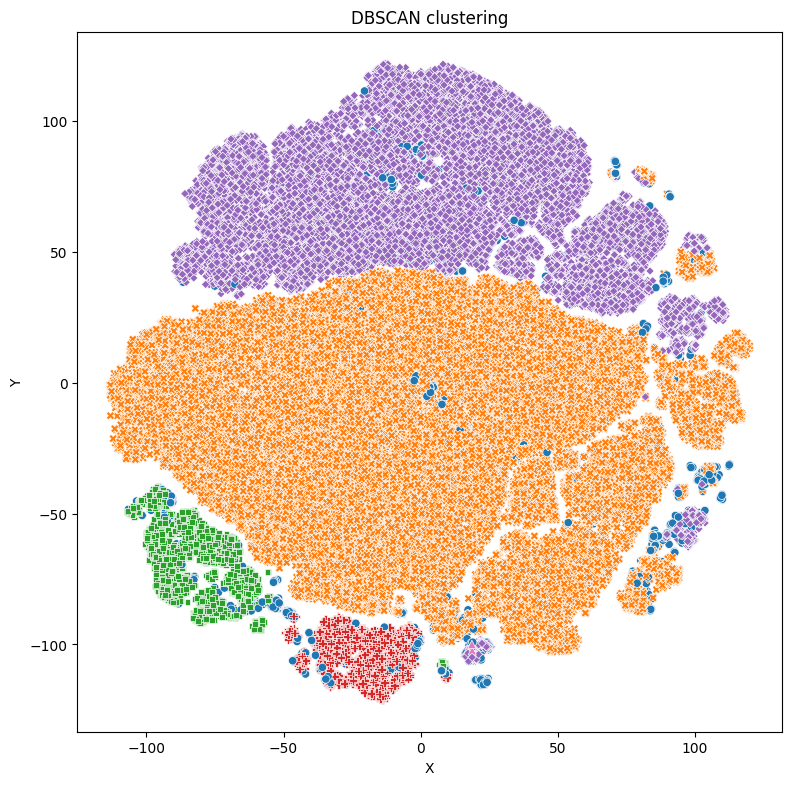

In [8]:

dbscan_model = single_model_and_plot('DBSCAN', scaled_features,df2, "DBSCAN clustering")


In [9]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

def music_recommend_content_based(data, given_song_features, N=10):
    # Feature Similarity Recommendation:
    # excluding non-numeric ones like song_title
    # features= df.drop(['name', 'album', 'artists','kmeans_labels'], axis=1)
    features= df.drop(['id','name', 'album','album_id','artists','artist_ids','release_date','disc_number','explicit','mode',
                       'time_signature'], axis=1)
    # Compute similarity between given_song and all songs in the dataset
    similarity_scores = cosine_similarity(features,
                                      np.array([given_song_features[feature] for feature in features.columns]).reshape(1, -1))
    # Rank songs based on similarity
    data['similarity'] = similarity_scores

    # Recommend top N songs
    top_N_recommendations = data.sort_values(by='similarity', ascending=False).head(N)

    return top_N_recommendations['name'].tolist()

given_song_features ={
    # 'id':'7lmeHLHBe4nmXzuXc0HDjk',
    'name': 'Testify',
    'album': 'The Battle Of Los Angeles',
    'artists': ['Rage Against The Machine'],
    'track_number': 1,
    'danceability': 0.47,
    'energy': 0.978,
    'key': 7,
    'loudness': -5.399,
    'speechiness': 0.0727,
    'acousticness': 0.0261,
    'instrumentalness': 0.000011,
    'liveness': 0.356,
    'valence': 0.503,
    'tempo': 117.906,
    'duration_ms': 210133.0,
    'year': 1999.0,
    # 'kmeans_labels':0
}
recommended_songs = music_recommend_content_based(df, given_song_features, N=10)
print(recommended_songs)

['Testify', 'Osaka', 'Veillée spatiale', 'This Side of Paradise', 'The West Mabou Reel/Up Downey/Calum Finlay/All The Rage', 'Young - KO:YU Remix', 'The Ride', 'Sonido Total', 'Before You Were Born', "(It's Good) To Be Free - Live for Teenage Cancer Trust"]
